In [ ]:
"""
requirements:
 tesorflow 2.3.9
 numpy 1.20.1
 keras 2.4.3
"""
import matplotlib.pyplot as plt
import numpy as np
from keras import layers
import os
import tensorflow as tf
from keras.preprocessing import text, sequence
import csv
import random
import pandas as pd

In [ ]:
# 数据读取    
df = pd.read_csv('/content/drive/MyDrive/100k/allTrimed.csv')
Labels, Reviews = df['label'].astype('int64'), df['review'].astype('str')

# 查看数据
print(Reviews[0:100000:10000])
print(Labels[0:100000:10000])

0                  更博 爆照 帅 的 呀 越来越 爱 生快 傻 缺 [爱你] [爱你] [爱你]
10000                        这锅 到 你家 作用 最大化 [鼓掌] [鼓掌] [鼓掌]
20000                                   [鼓掌] 惠斯勒 费尔蒙 城堡 酒店
30000                                          我天 [晕] [哈哈]
40000                          再 转 幸福 随行 [可爱] 转 一个 看看 宾 麒麟
50000                                 马总说 太累 也 该 歇歇 嘞 [哈哈]
60000                              有 这种 动画片 太有 创意 没 看过 [晕]
70000    那 广告 三观 不正 得 [泪] 相比之下 搞 百合 都 比 那 正常 阿 哈哈哈哈 哈哈哈...
80000    还要 身体健康 内心 踏实 人 最 值得 高兴 的 事 父母 健在 知己 两三 盗 不 走 ...
90000    物业 不给力 周末 没 空调 度 的 杭州 伤不起 敢不敢 给 周末 加班 的 人 一点 生...
Name: review, dtype: object
0        1
10000    1
20000    1
30000    1
40000    1
50000    1
60000    0
70000    0
80000    0
90000    0
Name: label, dtype: int64


In [ ]:
# 打乱并分割数据集
from sklearn.model_selection import train_test_split

# random_state表示随机数种子
Labels_train, Labels_test, Reviews_train, Reviews_test = train_test_split(
    Labels, Reviews, 
    test_size=0.3, random_state=0
)
Labels_train[:5], Reviews_train[:5]

(98527     0
 118837    0
 105566    0
 9652      1
 41894     1
 Name: label, dtype: int64,
 98527     被盗 号 评论 的 表情 炙 嘛 在 境外 吗 那不就 是 境外 势力 来 的 陷害 造谣 ...
 118837                                   [嘻嘻] [哈哈] [衰] [围观]
 105566    有 地狱 请 带走 魔鬼 [怒] [抓狂] 直接 剐 禽兽 逍遥 于 官场 当心 官场 变成...
 9652             文艺 的 名称 时光 绘 但 颜色 搭配 感觉 有点 怪 终于 对外 发声 [可爱]
 41894                       凑热闹 去 [嘻嘻] 到 时人 肯定 少不了 [嘻嘻] 吴京红
 Name: review, dtype: object)

In [ ]:
"""
テキストをトークン化する
String to INT
"""

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

# テキストの最大長を取得
# 今回はLSTMの入力を固定長にするため
max_len = max(map(len, Reviews))

# トークン化
tokenizer = Tokenizer()
tokenizer.fit_on_texts(Reviews_train)
reviews_train = tokenizer.texts_to_sequences(Reviews_train)
reviews_test = tokenizer.texts_to_sequences(Reviews_test)

for text, vector in zip(Reviews_train[0:3], reviews_train[0:3]):
    print(text)
    print(vector)
    
# 固定長ゼロパディング
# 向量填充
reviews_train = pad_sequences(reviews_train, maxlen=max_len)
reviews_test = pad_sequences(reviews_test, maxlen=max_len)

print(reviews_train[0])
print(type(reviews_train))

被盗 号 评论 的 表情 炙 嘛 在 境外 吗 那不就 是 境外 势力 来 的 陷害 造谣 吗 [怒] 能 确定 是 人民日报 吗 支持 人民日报 人民日报 观点 尖锐 咱转 一下 被 认为 是 传谣
[6051, 222, 480, 1, 905, 29305, 163, 6, 10205, 34, 29306, 4, 10205, 8673, 29, 1, 20785, 4288, 34, 17, 45, 1592, 4, 6052, 34, 121, 6052, 6052, 4007, 20786, 37379, 95, 39, 950, 4, 20787]
[嘻嘻] [哈哈] [衰] [围观]
[5, 2, 19, 92]
有 地狱 请 带走 魔鬼 [怒] [抓狂] 直接 剐 禽兽 逍遥 于 官场 当心 官场 变成 禽兽 养殖场
[10, 4610, 87, 2698, 5567, 17, 8, 288, 37380, 3632, 6754, 439, 16253, 6053, 16253, 496, 3632, 53439]
[    0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0  

In [ ]:
"""
正解データをone-hotベクトル化
one-hot正则化label
"""
from keras.utils import np_utils

labels_train = np.array(Labels_train, dtype=int)
labels_train = np_utils.to_categorical(labels_train) 
labels_test = np.array(Labels_test, dtype=int)
labels_test = np_utils.to_categorical(labels_test) 

In [ ]:
"""
学習モデルの構築
构建模型
"""

from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding, Dropout
from keras.optimizers import RMSprop

# one-hot词有点多，可以考虑用字，或者改用word2vec或Fasttext
vocabulary_size = len(tokenizer.word_index) + 1  

model = Sequential()

model.add(Embedding(input_dim=vocabulary_size, output_dim=32))   # Embbedding層ではトークン化されたテキストをベクトル化する
model.add(LSTM(16, return_sequences=False, dropout=0.5))  #　すぐ過学習しがちなのでドロップアウトを入れる
model.add(Dense(2, activation='softmax'))   # ３値分類のためsoftmax関数を使用 改为2值分类

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])   # RMSpropが学習しやすそう

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 32)          3454880   
_________________________________________________________________
lstm (LSTM)                  (None, 16)                3136      
_________________________________________________________________
dense (Dense)                (None, 2)                 34        
Total params: 3,458,050
Trainable params: 3,458,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 学習
# 训练
history = model.fit(
    reviews_train, labels_train, batch_size=32, epochs=10,
    validation_data=(reviews_test, labels_test)
)

Epoch 1/10
2625/2625 [==============================] - 346s 131ms/step - loss: 0.2001 - accuracy: 0.9297 - val_loss: 0.0569 - val_accuracy: 0.9792
Epoch 2/10
2625/2625 [==============================] - 350s 133ms/step - loss: 0.0562 - accuracy: 0.9793 - val_loss: 0.0505 - val_accuracy: 0.9798
Epoch 3/10
2625/2625 [==============================] - 343s 131ms/step - loss: 0.0517 - accuracy: 0.9796 - val_loss: 0.0522 - val_accuracy: 0.9797
Epoch 4/10
2625/2625 [==============================] - 348s 133ms/step - loss: 0.0534 - accuracy: 0.9796 - val_loss: 0.0526 - val_accuracy: 0.9797
Epoch 5/10
2625/2625 [==============================] - 347s 132ms/step - loss: 0.0536 - accuracy: 0.9795 - val_loss: 0.0543 - val_accuracy: 0.9796
Epoch 6/10
2625/2625 [==============================] - 348s 132ms/step - loss: 0.0552 - accuracy: 0.9791 - val_loss: 0.0570 - val_accuracy: 0.9794
Epoch 7/10
2625/2625 [==============================] - 347s 132ms/step - loss: 0.0533 - accuracy: 0.9800 - val_

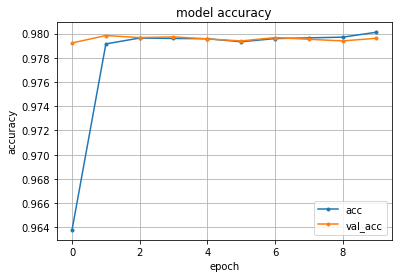

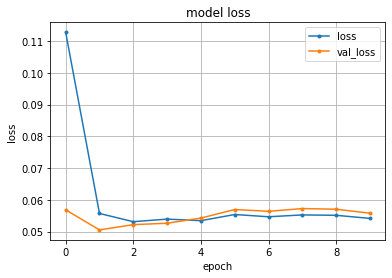

In [ ]:
from matplotlib import pyplot as plt

# 精度のplot
plt.plot(history.history['accuracy'], marker='.', label='acc')
plt.plot(history.history['val_accuracy'], marker='.', label='val_acc')
plt.title('model accuracy')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(loc='best')
plt.show()

# 損失のplot
plt.plot(history.history['loss'], marker='.', label='loss')
plt.plot(history.history['val_loss'], marker='.', label='val_loss')
plt.title('model loss')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(loc='best')
plt.show()

In [ ]:
"""
不正解データを表示
P：予測値
A:正解値
"""
pre = model.predict(reviews_test)

NameError: ignored

In [ ]:
print("P A text")
for i,v in enumerate(pre):
    pre_ans = v.argmax()
    ans = labels_test[i].argmax()
    dat = Reviews_test.iloc(i)
    if ans == pre_ans: continue
    print(pre_ans, ans, dat)

P A text
<class 'pandas.core.series.Series'>


ValueError: ignored

In [ ]:
# 検証
# input_textに190文字以下の英文を入力する

input_text = ["今天 哈哈 开心"]
input_text = tokenizer.texts_to_sequences(input_text)
input_text = pad_sequences(input_text, maxlen=max_len)
pre = model.predict(input_text)
pre_ans = pre.argmax()
print(pre_ans)

1
